In [9]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [27]:
# Parameters
outputDir='../../../output/Hen15_sfh2/'
filePrefix='SA_output_'
filePostfix='.h5'
snap1='30'
redshift1=2.1
snap2='58'
redshift2=0
snap1='17'
redshift1=5.9
snap2='22'
redshift2=4
firstFile=5
lastFile=5
xmin=1e11
xmax=1e14
ymin=2e6
ymax=2e9
baryonFrac=0.155 # Read from header!
Hubble_h=0.673
Central=True

In [28]:
# First determine the size of the arrays that we need to hold the data
nGal1=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal1+=len(f[snap1])
print('nGal1=',nGal1)

# Declare numpy arrays to hold the data
Type1=np.empty(nGal1)
Mvir1=np.empty(nGal1)
Rvir1=np.empty(nGal1)
Vvir1=np.empty(nGal1)
ColdGasRadius1=np.empty(nGal1)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap1])
        Type1[iGal:iGal+nGalFile]=f[snap1]['Type']
        Mvir1[iGal:iGal+nGalFile]=f[snap1]['Mvir']
        Rvir1[iGal:iGal+nGalFile]=f[snap1]['Rvir']
        Vvir1[iGal:iGal+nGalFile]=f[snap1]['Vvir']
        ColdGasRadius1[iGal:iGal+nGalFile]=f[snap1]['ColdGasRadius']
        iGal+=nGalFile
        
if Central:
    Index=np.where(Type1==0)
    Mvir1=Mvir1[Index]
    Rvir1=Rvir1[Index]
    Vvir1=Vvir1[Index]
    ColdGasRadius1=ColdGasRadius1[Index]
    
nGal2=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal2+=len(f[snap2])
print('nGal1=',nGal1)

# Declare numpy arrays to hold the data
Type2=np.empty(nGal2)
Mvir2=np.empty(nGal2)
Rvir2=np.empty(nGal2)
Vvir2=np.empty(nGal2)
ColdGasRadius2=np.empty(nGal2)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap2])
        Type2[iGal:iGal+nGalFile]=f[snap2]['Type']
        Mvir2[iGal:iGal+nGalFile]=f[snap2]['Mvir']
        Rvir2[iGal:iGal+nGalFile]=f[snap2]['Rvir']
        Vvir2[iGal:iGal+nGalFile]=f[snap2]['Vvir']
        ColdGasRadius2[iGal:iGal+nGalFile]=f[snap2]['ColdGasRadius']
        iGal+=nGalFile
        
if Central:
    Index=np.where(Type2==0)
    Mvir2=Mvir2[Index]
    Rvir2=Rvir2[Index]
    Vvir2=Vvir2[Index]
    ColdGasRadius2=ColdGasRadius2[Index]

nGal1= 1552
nGal1= 1552


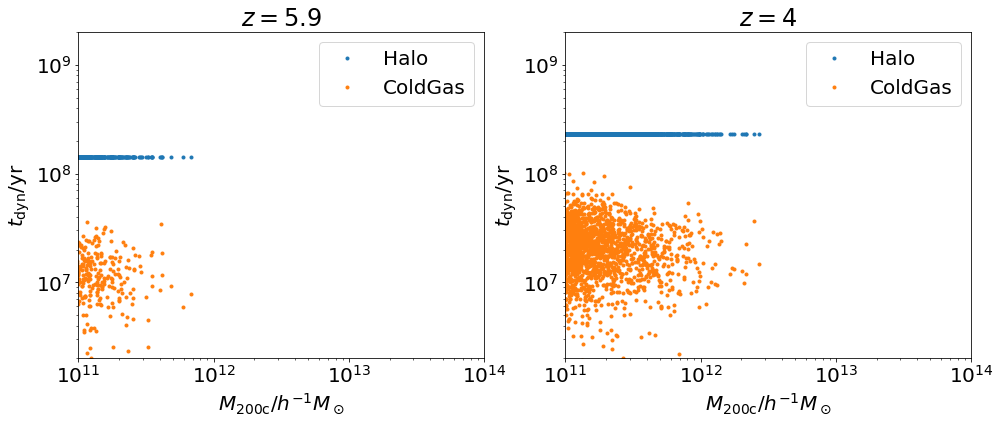

In [29]:
tHalo1=(Rvir1*u.Mpc/Hubble_h/(Vvir1*u.km/u.s)).to(u.yr)
tColdGas1=(ColdGasRadius1*u.Mpc/Hubble_h/(Vvir1*u.km/u.s)).to(u.yr)
tHalo2=(Rvir2*u.Mpc/Hubble_h/(Vvir2*u.km/u.s)).to(u.yr)
tColdGas2=(ColdGasRadius2*u.Mpc/Hubble_h/(Vvir2*u.km/u.s)).to(u.yr)

plt.figure(0,figsize=(16,6))
plt.subplot(1,2,1)
plt.loglog(Mvir1*1e10,tHalo1,'.',label='Halo')
plt.loglog(Mvir1*1e10,tColdGas1,'.',label='ColdGas')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$t_\mathrm{dyn}/\mathrm{yr}$')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.title(r'$z='+str(redshift1)+'$')
plt.legend()
plt.subplot(1,2,2)
plt.loglog(Mvir2*1e10,tHalo2,'.',label='Halo')
plt.loglog(Mvir2*1e10,tColdGas2,'.',label='ColdGas')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$t_\mathrm{dyn}/\mathrm{yr}$')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.title(r'$z='+str(redshift2)+'$')
plt.legend()

#plt.savefig('figs/HotGas_'+outputDir.split('/')[-2]+'.png')